<a href="https://colab.research.google.com/github/Muzanua/CapstoneProject/blob/main/TRAINING_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('plant_health_data.csv')
print(df.columns)

Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')


In [ ]:
print(df.describe())
print(df[['Soil_Moisture', 'Ambient_Temperature', 'Humidity']].corr())

          Plant_ID  Soil_Moisture  Ambient_Temperature  Soil_Temperature  \
count  1200.000000    1200.000000          1200.000000       1200.000000   
mean      5.500000      25.106918            23.999130         19.957794   
std       2.873479       8.677725             3.441561          2.932073   
min       1.000000      10.000724            18.001993         15.003710   
25%       3.000000      17.131893            21.101766         17.353027   
50%       5.500000      25.168333            23.889044         19.911473   
75%       8.000000      32.370231            27.042634         22.596851   
max      10.000000      39.993164            29.990886         24.995929   

          Humidity  Light_Intensity      Soil_pH  Nitrogen_Level  \
count  1200.000000      1200.000000  1200.000000     1200.000000   
mean     54.853165       612.637265     6.524102       30.106751   
std       8.784916       228.318853     0.581755       11.514396   
min      40.028758       200.615482     5.5

In [ ]:
# ==========================================
# STEP 1: Import Library
# ==========================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers

# ==========================================
# STEP 2: Load Data
# ==========================================
df = pd.read_csv('plant_health_data.csv')

# Pilih fitur dan target
X = df[['Soil_Moisture', 'Ambient_Temperature', 'Humidity']].values
y = df['Plant_Health_Status'].values  # Kategorikal

# ==========================================
# STEP 3: Preprocessing Label
# ==========================================
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)       # 'Healthy' → 0, dst
y_categorical = to_categorical(y_encoded, num_classes=3)

# ==========================================
# STEP 4: Normalisasi Input
# ==========================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# STEP 5: Train/Val/Test Split
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# ==========================================
# STEP 6: Build Model
# ==========================================
def build_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model((3,), 3)

# ==========================================
# STEP 7: Train
# ==========================================
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

# ==========================================
# STEP 8: Convert to TFLite
# ==========================================
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("PlantHealth.tflite", "wb") as f:
    f.write(tflite_model)

# ==========================================
# STEP 9: Convert to .h
# ==========================================
!xxd -i PlantHealth.tflite > PlantHealth.h


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3746 - loss: 1.0983 - val_accuracy: 0.3571 - val_loss: 1.0906
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4894 - loss: 1.0649 - val_accuracy: 0.4286 - val_loss: 1.0700
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5304 - loss: 1.0295 - val_accuracy: 0.4702 - val_loss: 1.0318
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5572 - loss: 0.9860 - val_accuracy: 0.5476 - val_loss: 0.9726
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5787 - loss: 0.9252 - val_accuracy: 0.5833 - val_loss: 0.9033
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6354 - loss: 0.8445 - val_accuracy: 0.6548 - val_loss: 0.8317
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6634 - loss: 0.7959 - val_accuracy: 0.6548 - val_loss: 0.7834
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7455 - loss: 0.7117 - val_accuracy: 0.6548 - val_loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:

                 precision    recall  f1-score   support

        Healthy       0.78      0.88      0.83        92
    High Stress       0.94      0.81      0.87       144
Moderate Stress       0.81      0.86      0.84       124

       accuracy                           0.85       360
      macro avg       0.84      0.85      0.85       360
   weighted avg       0.86      0.85      0.85       360

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


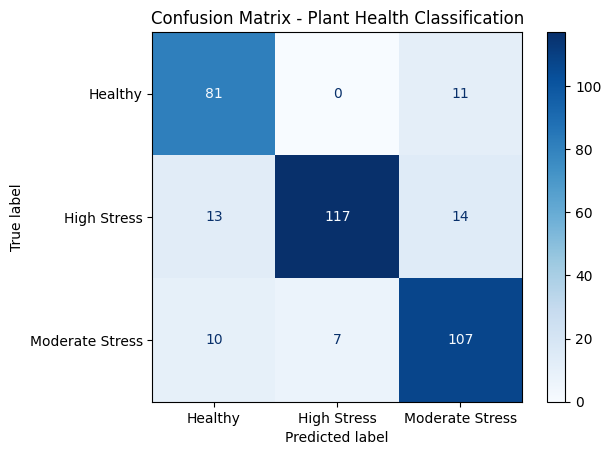

In [ ]:
# ==========================================
# STEP 10: Precision, Recall, F1-Score, and Confusion Matrix
# ==========================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Gunakan model untuk memprediksi kelas dari data uji
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan laporan klasifikasi
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)

# Prediksi dengan data uji
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Plant Health Classification')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8768 - loss: 0.4289  
Test Accuracy: 84.72%
